In [1]:
# Note to self, to open this from anaconda, put 'code .' in the anaconda
# prompt and remember to choose the correct workspace on the top right
# mask into contour, this will give us a bunch of a coordinates and then you average it to find the position 
# Convert to hsv instead of rgb
import cv2
import numpy as np
import matplotlib.pyplot as plt

MAZE_FILE_NAME = "../Maze.png"
ROBOT_FILE_NAME = "../Robot.pnh"
IMAGE_LADYBUG_FILE_NAME = "../Ladybug_small.png"
MAP_FILE_NAME = "../MapBuilt.txt"

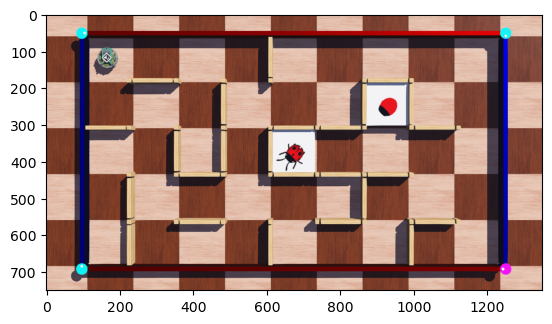

In [2]:
## Read in the images
# Read in maze as BGR
# Maze 7 has error (arrow direc)
# Maze 10 has error (transfomartion)
imgBGR = cv2.imread(MAZE_FILE_NAME)

# imgBGR1 = imgBGR1.astype('uint8')
# imgBGR2 = imgBGR2.astype('uint8')

# Convert BGR to RGB
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

# Show the RGB images
plt.imshow(imgRGB)
plt.show()

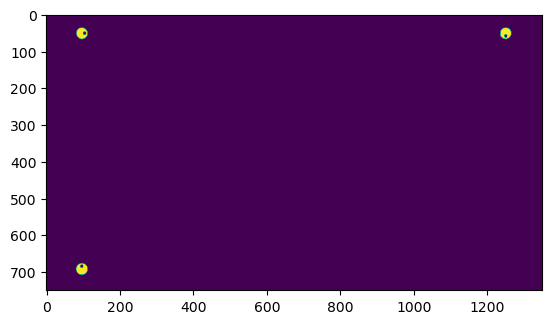

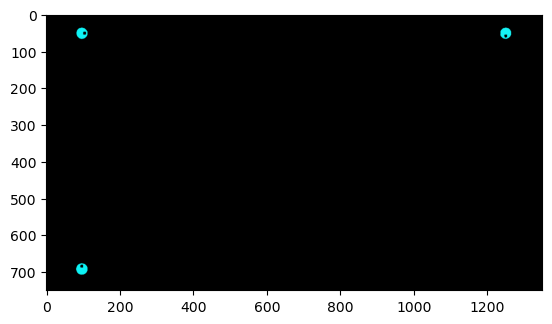

In [3]:
## Finding the cornerstones
# For imgRGB1
# Create a mask for cyan
maskC = cv2.inRange(imgRGB, (0,100,100), (50,255,255))
# Apply mask to the image
maskingC = cv2.bitwise_and(imgRGB, imgRGB, mask=maskC)

# Show the mask for cyan
plt.imshow(maskC)
plt.show()

# Show the resultant image for cyan
plt.imshow(maskingC)
plt.show()


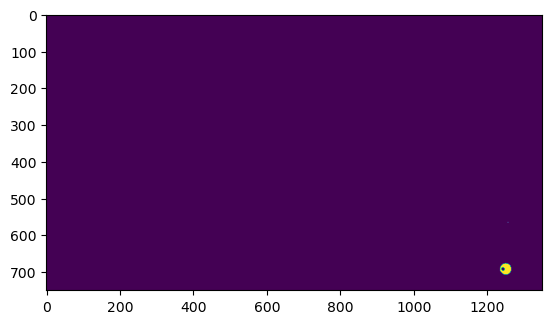

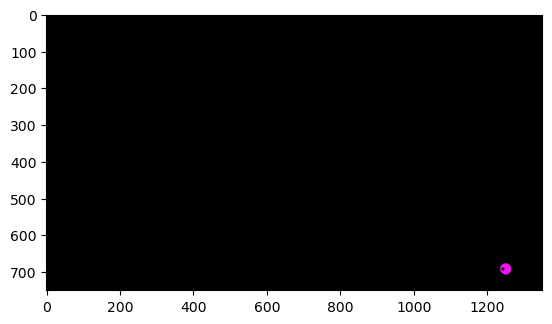

In [4]:
# Create a mask for magenta
maskM = cv2.inRange(imgRGB, (100,0,100), (255,50,255))
# Apply mask to the image
maskingM = cv2.bitwise_and(imgRGB, imgRGB, mask=maskM)

# Show the mask for magenta
plt.imshow(maskM)
plt.show()

# Show the resultant image for magenta
plt.imshow(maskingM)
plt.show()


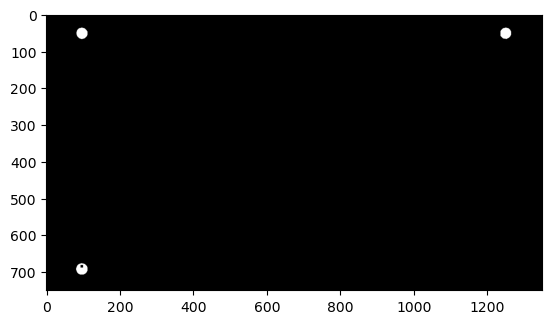

In [5]:
## Do closing to reduce any outliers for cyan
kernelO = np.ones((3,3), np.uint8)
kernelC = np.ones((7,7), np.uint8)

# When I do closing only, I get random dots on the map
# So I do opening first to remove those and then closing
openingC = cv2.morphologyEx(maskC, cv2.MORPH_OPEN, kernelO)
closingC = cv2.morphologyEx(openingC, cv2.MORPH_CLOSE, kernelC)

# show result
plt.imshow(closingC,cmap='gray')
plt.show()

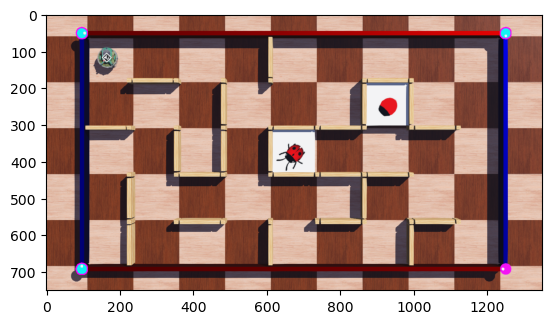

In [6]:
# Create outline around Cyan corrner stones
# Convert the closed image to grayscale
closingCCanny = cv2.Canny(closingC, threshold1 = 50, threshold2= 100, apertureSize = 3)

# Detect the contours
imgTemp, contours, hierarchy = cv2.findContours(closingCCanny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(imgRGB, contours, -1, (255,0,255), 2)

plt.imshow(imgRGB)
plt.show()

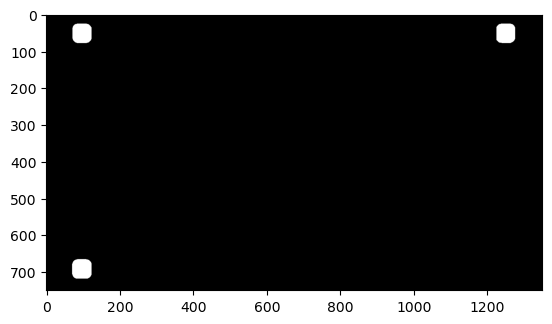

In [7]:
## Dilate to increase area to work with for cyan
# create a 3x3 kernel
kernel = np.ones((3,3), np.uint8)

# dilate, 11 times
dilationC = cv2.dilate(closingC, kernel, iterations = 11)

# show result
plt.imshow(dilationC,cmap="gray")
plt.show()

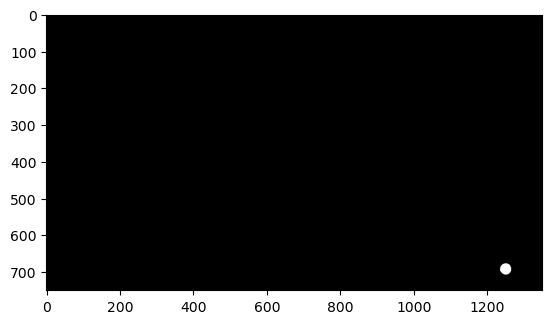

In [8]:
# Do closing to remove any openings in magenta
# create a 7x7 kernel
kernelO = np.ones((3,3), np.uint8)
kernelC = np.ones((7,7), np.uint8)

# When I do closing only, I get random dots on the map
# So I do opening first to remove those and then closing
openingM = cv2.morphologyEx(maskM, cv2.MORPH_OPEN, kernelO)
closingM = cv2.morphologyEx(openingM, cv2.MORPH_CLOSE, kernelC)

# show result
plt.imshow(closingM,cmap='gray')
plt.show()

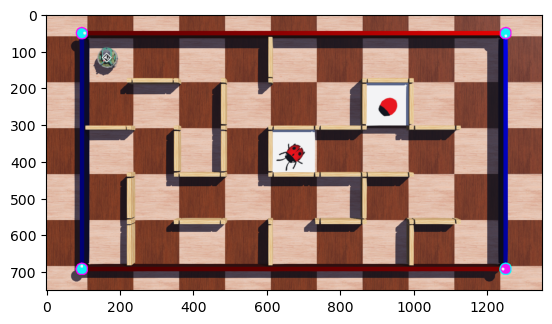

In [9]:
# Create outline around Magenta corrner stone
# Conver the opened image to grayscale
closingMCanny = cv2.Canny(closingM, threshold1 = 50, threshold2= 100, apertureSize = 3)

# Detect the contours
imgTemp, contours, hierarchy = cv2.findContours(closingMCanny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(imgRGB, contours, -1, (0,255,255), 2)

plt.imshow(imgRGB)
plt.show()

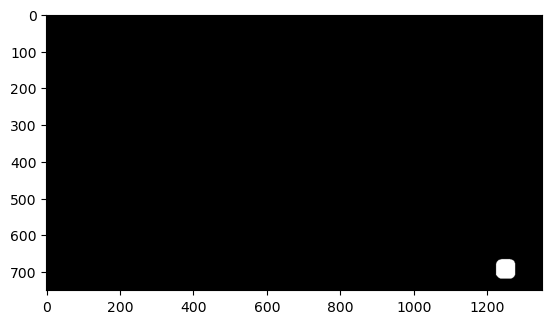

In [10]:
## Dilate to increase area to work with for magenta
# create a 3x3 kernel
kernel = np.ones((3,3), np.uint8)

# dilate, 11 times
dilationM = cv2.dilate(closingM, kernel, iterations = 11)

# show result
plt.imshow(dilationM,cmap="gray")
plt.show()

In [11]:
## Contouring for Cyan 
# Define binding rectangle colour
RGB_GREEN = (0, 255, 0)
cords = []
cordsList = []

# find contours within mask
contours = cv2.findContours(dilationC, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

# find the bounding rectangle in the list of contours
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    #cv2.rectangle(imgRGB, (x, y), (x+w, y+h), RGB_GREEN, 2)
    xcord = int(x+w/2)
    ycord = int(y+h/2)
    cords.append(xcord)
    cords.append(ycord)
    cordsList.append(cords)
    cords = []
    print("x, y, w, h, xcord, ycord:",x,y,w,h,xcord,ycord)

x, y, w, h, xcord, ycord: 71 666 53 53 97 692
x, y, w, h, xcord, ycord: 1226 26 51 53 1251 52
x, y, w, h, xcord, ycord: 72 26 52 53 98 52


In [12]:
## Contouring for magenta 

# find contours within mask
contours = cv2.findContours(dilationM, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

# find the bounding rectangle in the list of contours
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    # cv2.rectangle(imgRGB, (x, y), (x+w, y+h), RGB_GREEN, 2)
    xcord = int(x+w/2)
    ycord = int(y+h/2)
    cords.append(xcord)
    cords.append(ycord)
    cordsList.append(cords)
    cords = []
    print("x, y, w, h, xcord, ycord:",x,y,w,h,xcord,ycord)

x, y, w, h, xcord, ycord: 1225 666 52 53 1251 692


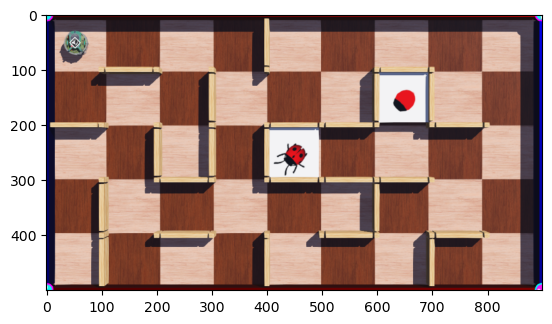

In [13]:
## Transform the image
# Obtaining the coordinates of the origin
xcordM = cordsList[3][0]
ycordM = cordsList[3][1]

# Find which quadrant each coordinate is in
for cords in cordsList:
    # If it is in the top left corner
    if cords[0] < 340:
        if cords[1] < 375:
            topLeft = cords
    # If it is in the top right corner
    if cords[0] >900:
        if cords[1] < 375:
            topRight = cords
    # If it is in the bottom left corner
    if cords[0] < 340:
        if cords[1] > 375:
            bottomLeft = cords
    # If it is in the bottom right corner
    if cords[0] > 340:
        if cords[1] > 375:
            bottomRight = cords

# If the magenta corner is in the bottom right, we do not need to 'rotate' the image
if xcordM > 340:
    ptsOriginal = np.float32([topLeft,topRight,bottomLeft,bottomRight])
# If the magenta corner is in the top left, we need to 'rotate' the image
if xcordM < 340:
    ptsOriginal = np.float32([bottomRight,bottomLeft,topRight,topLeft])
# Dimensions of transformed image is 900 by 500 (lenght to width)
ptsTransformed = np.float32([[0,0],[900,0],[0,500],[900,500]])

# Get the H matrix
H = cv2.getPerspectiveTransform(ptsOriginal,ptsTransformed)

dst = cv2.warpPerspective(imgRGB,H, (900,500))
plt.imshow(dst)
plt.show()

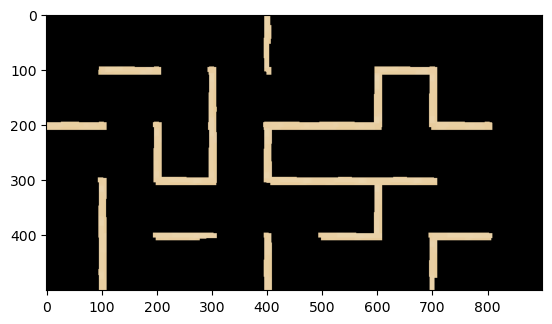

In [14]:
# Wall Detection COLOUR
# Using colour to detect the wall
# Wall mask
# Create a mask for Wall colour (beige?)
maskW = cv2.inRange(dst, (190,203,104), (236,217,181))
# Apply mask to the image
maskingW = cv2.bitwise_and(dst, dst, mask=maskW)

# Clean up the masking so it doesn't look that bad
kernelES = np.ones((2,2), np.uint8) # Small erosion kernel for small parts
kernelEL = np.ones((7,7), np.uint8) # Large erosion kernel for large parts
kernelD = np.ones((3,3), np.uint8)
kernelO = np.ones((2,2), np.uint8)
kernelC = np.ones((20,20), np.uint8)
erosionW = cv2.erode(maskingW, kernelES, iterations = 1) # Erode first to get rid of outlier pixels
dilateW = cv2.dilate(erosionW, kernelD, iterations = 10)
erosionW = cv2.erode(dilateW, kernelEL, iterations = 2)
# openingW = cv2.morphologyEx(dilateW, cv2.MORPH_OPEN, kernelO)
closingW = cv2.morphologyEx(dilateW, cv2.MORPH_CLOSE, kernelC) # Closing to reduce most of the jagged edges
# dilateW = cv2.dilate(closingW, kernelD, iterations = 1)
erosionW = cv2.erode(closingW, kernelEL, iterations = 2)

plt.imshow(erosionW)
plt.show()


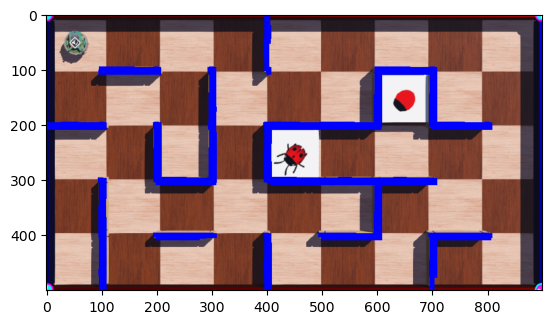

In [15]:
# Find wall contours
erosionWGray = cv2.cvtColor(erosionW, cv2.COLOR_BGR2GRAY)
wallContours = cv2.findContours(erosionWGray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
wallContours = wallContours[0] if len(wallContours) == 2 else wallContours[1]
# cv2.drawContours(dst, wallContours, -1, (0,0,255), 2)
cv2.fillPoly(dst, pts=wallContours, color=(0, 0, 255))


plt.imshow(dst)
plt.show()

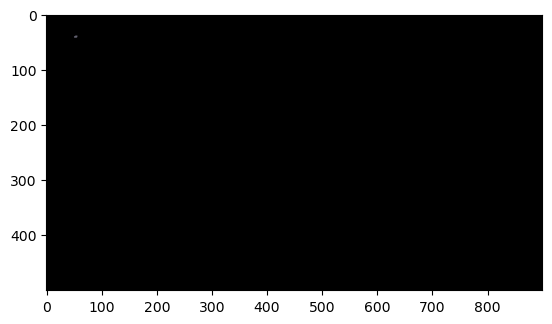

In [16]:
# ## Robot detection
# Since fiducial marker dection did not work and I couldn't get sift to work, I will be using colour detecton
# Cannot scan for black and white of the fiducial marker because there are other B/W objects in the map

# Create mask for dark grey 'button' on robot
maskG = cv2.inRange(dst, (98,99,114), (170,170,180))
# Apply mask to the image
maskingG = cv2.bitwise_and(dst, dst, mask=maskG)

# Clean up the masking so it doesn't look that bad
kernelES = np.ones((2,2), np.uint8) # Small erosion kernel for small parts
kernelEL = np.ones((7,7), np.uint8) # Large erosion kernel for large parts
kernelD = np.ones((3,3), np.uint8)
kernelO = np.ones((2,2), np.uint8)
kernelC = np.ones((20,20), np.uint8)
erosionG = cv2.erode(maskingG, kernelES, iterations = 5) # Erode first to get rid of outlier pixels
dilateG = cv2.dilate(erosionG, kernelD, iterations = 1) # Increase the area we are working with

plt.imshow(dilateG)
plt.show()


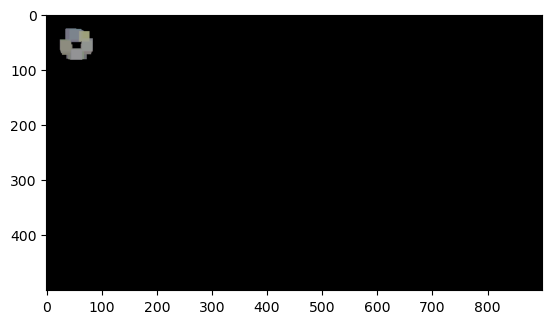

In [17]:
# Create a mask for the green portion of robot (the circuit board)
maskGreen = cv2.inRange(dst, (99,134,84), (148,171,70))
# Apply mask to the image
maskingGreen = cv2.bitwise_and(dst, dst, mask=maskG)

# Clean up the masking so it doesn't look that bad
kernelES = np.ones((2,2), np.uint8) # Small erosion kernel for small parts
kernelEL = np.ones((7,7), np.uint8) # Large erosion kernel for large parts
kernelD = np.ones((3,3), np.uint8)
kernelO = np.ones((2,2), np.uint8)
kernelC = np.ones((20,20), np.uint8)
erosionGreen = cv2.erode(maskingGreen, kernelES, iterations = 2) # Erode first to get rid of outlier pixels
dilateGreen = cv2.dilate(erosionGreen, kernelD, iterations = 9) # Increase the area we are working with

plt.imshow(dilateGreen)
plt.show()

x, y, w, h, xcord, ycord: 25 26 60 57 55 54


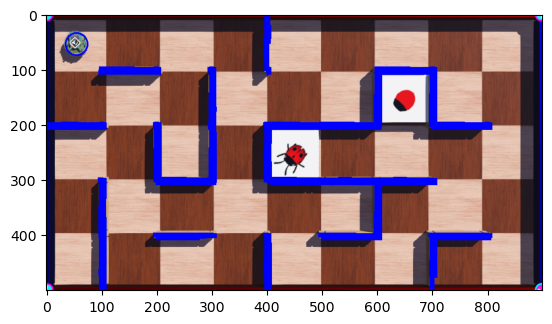

In [18]:
# Find the coordinates of the centre of the robot
dilateGreenGray = cv2.cvtColor(dilateGreen, cv2.COLOR_BGR2GRAY)
centreContours = cv2.findContours(dilateGreenGray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
centreContours = centreContours[0] if len(centreContours) == 2 else centreContours[1]
centreCoord = ()

# Find the position of the robot's centre
for contour in centreContours:
    x,y,w,h = cv2.boundingRect(contour)
    #cv2.rectangle(imgRGB, (x, y), (x+w, y+h), RGB_GREEN, 2)
    xcord = int(x+w/2)
    ycord = int(y+h/2)
    centreCoord = (xcord,ycord)
    print("x, y, w, h, xcord, ycord:",x,y,w,h,xcord,ycord)

# Draw the circle around the centre of the robot
cv2.circle(dst, centreCoord, 20, (0,0,255), 2)

plt.imshow(dst)
plt.show()

robotCentre 55
robotCentre 54
robotcoord[0] 54
robotcoord[1] 41


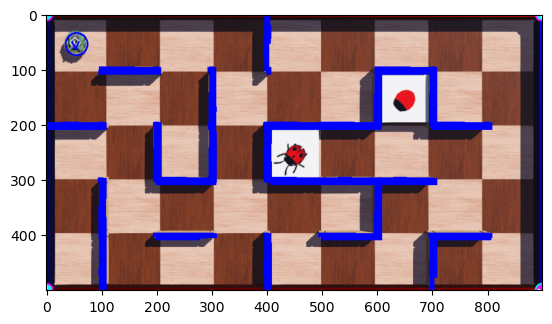

In [19]:
## Now that we have found the back of the robot, we can find which direction it is facing using its position relative to the middle of each cell
# find contours within mask
dilateGGray = cv2.cvtColor(dilateG, cv2.COLOR_BGR2GRAY)
robotContours = cv2.findContours(dilateGGray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
robotContours = robotContours[0] if len(robotContours) == 2 else robotContours[1]
robotCoord = []

# Find the position of the robot's back
for contour in robotContours:
    x,y,w,h = cv2.boundingRect(contour)
    #cv2.rectangle(imgRGB, (x, y), (x+w, y+h), RGB_GREEN, 2)
    xcord = int(x+w/2)
    ycord = int(y+h/2)
    robotCoord.append(xcord)
    robotCoord.append(ycord)

print('robotCentre',centreCoord[0])
print('robotCentre',centreCoord[1])
print('robotcoord[0]',robotCoord[0])
print('robotcoord[1]',robotCoord[1])

# Initialize the heading variable to be used for later
heading = ''

# Find the bigger difference in between the coordinates
# If the biggest difference is horizontal
if abs(robotCoord[0]-centreCoord[0]) > abs(robotCoord[1]-centreCoord[1]):
    # If the robot is facing to the right
    if robotCoord[0]-centreCoord[0] < 0:
        dst = cv2.putText(dst, '>', (centreCoord[0]-10,centreCoord[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2,cv2.LINE_AA)
        heading = '>'
    # If the robot is facing the left
    else:
        dst = cv2.putText(dst, '<', (centreCoord[0]-10,centreCoord[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2,cv2.LINE_AA)
        heading = '<'
# If the biggest difference is vertical
if abs(robotCoord[1]-centreCoord[1]) > abs(robotCoord[0]-centreCoord[0]):
    # If the robot is facing up
    if robotCoord[0]-centreCoord[0] > 0:
        dst = cv2.putText(dst, '^', (centreCoord[0]-10,centreCoord[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2,cv2.LINE_AA)
        heading = '^'
    # If the robot is facing down
    else:
        dst = cv2.putText(dst, 'v', (centreCoord[0]-10,centreCoord[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2,cv2.LINE_AA)
        heading = 'v'

plt.imshow(dst)
plt.show()

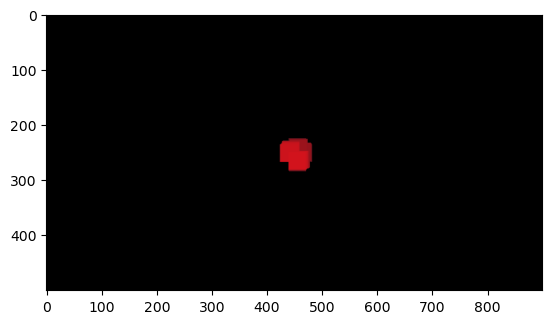

In [20]:
## Target recognition
# Masking for dark red
maskRed = cv2.inRange(dst, (70,10,10), (230,50,50))
# Apply mask to the image
maskingRed = cv2.bitwise_and(dst, dst, mask=maskRed)

# Clean up the masking so it doesn't look that bad
kernelES = np.ones((3,3), np.uint8) # Small erosion kernel for small parts
kernelEL = np.ones((5,5), np.uint8) # Large erosion kernel for large parts
kernelD = np.ones((3,3), np.uint8)
kernelO = np.ones((2,2), np.uint8)
kernelC = np.ones((20,20), np.uint8)

# Erode a lot first to get rid of the fake one
erosionRed = cv2.erode(maskingRed, kernelES, iterations = 2) # Erode first to get rid of outlier pixels
dilateRed = cv2.dilate(erosionRed, kernelD, iterations = 15) # Increase the area we are working with


plt.imshow(dilateRed)
plt.show()


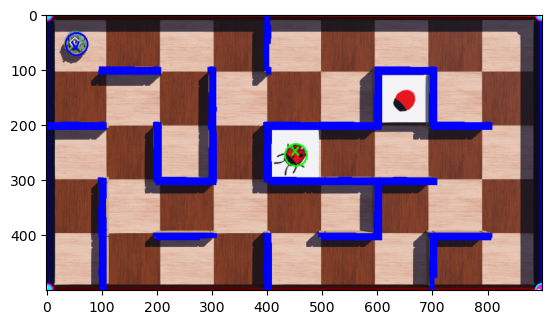

In [21]:
# Now we contour to find the center of the ladybug
dilateRedGray = cv2.cvtColor(dilateRed, cv2.COLOR_BGR2GRAY)
ladybugContours = cv2.findContours(dilateRedGray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
ladybugContours = ladybugContours[0] if len(ladybugContours) == 2 else ladybugContours[1]
ladybugCoord = []

# Find the position of the lady bug
for contour in ladybugContours:
    x,y,w,h = cv2.boundingRect(contour)
    #cv2.rectangle(imgRGB, (x, y), (x+w, y+h), RGB_GREEN, 2)
    xcord = int(x+w/2)
    ycord = int(y+h/2)
    # Sometimes it will catch the red of the outer walls, remove them from the mask
    if ycord > 15 and ycord < 485:
        ladybugCoord.append(xcord)
        ladybugCoord.append(ycord)

# Draw the circle around the centre of the ladybug (manually compensate for the fact that the red portion of the ladybug is lower than the center)
cv2.circle(dst, (int(ladybugCoord[0]),int(ladybugCoord[1])), 20, (0,255,0), 2)
# Draw the x too
cv2.putText(dst, 'x', (int(ladybugCoord[0]-10),int(ladybugCoord[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2,cv2.LINE_AA)

plt.imshow(dst)
plt.show()

In [22]:
## Converting to text file
mapFile = open(MAP_FILE_NAME,"w")
MAP_BORDER = " --- --- --- --- --- --- --- --- --- "
MAP_SIDE_STRING = '|                                   |\n'
MAP_EMPTY_STRING = '                                     \n'
tempString = ''

# Detect the walls from wallContours
horizontalWalls = []
verticalWalls = []


# Find all vertical walls
for contourList in wallContours:
    for contour in contourList:
        # check y coordinate if it is close to 50,150,150 so on
        if abs(contour[0][1]-50*round(contour[0][1]/50)) <= 30 and (50*round(contour[0][1]/50))%100 != 0:
            # Round it
            tempY = 50*round(contour[0][1]/50)
            # Check x coordinate if it is close to a 100
            if abs(contour[0][0] - 100*round(contour[0][0]/100)) <= 30:
                tempX = 100*round(contour[0][0]/100)
                # If both conditions are met, append the coordinate
                verticalWalls.append((tempX,tempY))
# Find all horizontal walls
for contourList in wallContours:
    for contour in contourList:
        # check x coordinate if it is close to 50,150,150 so on
        if abs(contour[0][0]-50*round(contour[0][0]/50)) <= 30 and (50*round(contour[0][0]/50))%100 != 0:
            # Round it
            tempY = 50*round(contour[0][0]/50)
            # Check y coordinate if it is close to a 100
            if abs(contour[0][1] - 100*round(contour[0][1]/100)) <= 30:
                tempX = 100*round(contour[0][1]/100)
                # If both conditions are met, append the coordinate
                wallCoord = []
                wallCoord.append(tempY)
                wallCoord.append(tempX)
                horizontalWalls.append((tempY,tempX))


# Remove duplicate walls
horizontalWalls = list(dict.fromkeys(horizontalWalls))
verticalWalls = list(dict.fromkeys(verticalWalls))

# Round off the ladybug and robot coordinates
robotCoord = [50*round(robotCoord[0]/50),50*round(robotCoord[1]/50)]
ladybugCoord = [50*round(ladybugCoord[0]/50),50*round(ladybugCoord[1]/50)]

# print(horizontalWalls)
# print(verticalWalls)

# Print the walls onto the map
mapFile.write(MAP_BORDER)
for rowIter in range(10):
    # At odd row (cell row)
    if rowIter%2 != 0:
        tempString = list(MAP_SIDE_STRING)
        # Loop through vertical wall list
        for wall in verticalWalls:
            # If the wall is in this row
            if wall[1]/50 == rowIter:
                # Find the wall's x coordinate on the map
                wallX = int((wall[0]/100)*4)
                tempString[wallX] ='|'
        # Check if the ladybug is in this row
        if ladybugCoord[1]/50 == rowIter:
            # Find the ladybug's x coordinate on the map
            ladybugCoordX = int((ladybugCoord[0]/100)*4)
            tempString[ladybugCoordX] ='x'
        # Check if the robot is in this row
        if robotCoord[1]/50 == rowIter:
            # Find the robot's x coordinate on the map
            robotCoordX = int((robotCoord[0]/100)*4)
            tempString[robotCoordX] = heading
        mapFile.write(''.join(tempString))
    # At even row (horizontal wall row)
    else:
        tempString = list(MAP_EMPTY_STRING)
        # Loop through the horizontal wall ist
        for wall in horizontalWalls:
            # If the wall is in this row
            if (wall[1]/100)*2 == rowIter:
                # Find the wall's x coordinate on the map
                if wall[0] == 50:
                    wallX = 1
                if wall[0] == 150:
                    wallX = 5
                if wall[0] == 250:
                    wallX = 9
                if wall[0] == 350:
                    wallX = 13
                if wall[0] == 450:
                    wallX = 17
                if wall[0] == 550:
                    wallX = 21
                if wall[0] == 650:
                    wallX = 25
                if wall[0] == 750:
                    wallX = 29
                if wall[0] == 950:
                    wallX = 33
                tempString[wallX] = '-'
                tempString[wallX+1] = '-'
                tempString[wallX+2] = '-'
        mapFile.write(''.join(tempString))
mapFile.write(MAP_BORDER)

mapFile.close()

